# HW2 Vectorization

Create a corpus. Add .txt files to the corpus.   
Use Python and CountVectorizer to convert the data (through the appropriate steps) to a dataframe (and to a matrix if you have time).   
Use the code example. Include labels in the data frame.

### Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('colheader_justify', 'center')

training set:

In [2]:
# use glob to create a list of train_pos_filenames
import glob
train_filenames = glob.glob(r'C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train/*.txt')
test_filenames = glob.glob(r'C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\test/*.txt')
print("train_text:")
print(train_filenames[:10])
print("\ntest_text:")
print(test_filenames[:10])

train_text:
['C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_01.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_02.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_03.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_04.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_05.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_06.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_07.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_08.txt', 'C:\\Users\\bing0\\

In [3]:
print(len(train_filenames))
print(len(test_filenames))

20
20


In [4]:
%time
# read the contents of the train_pos files into a list (each list element is one review)
train_text = []
for filename in train_filenames:
    with open(filename, encoding='utf-8') as f:
        train_text.append(f.read())
print("train_text:")
print(train_text[0])

test_text = []
for filename in test_filenames:
    with open(filename, encoding='utf-8') as f:
        test_text.append(f.read())
print("\ntest_text:")
print(test_text[0])

Wall time: 0 ns
train_text:
Robert DeNiro plays the most unbelievably intelligent illiterate of all time. This movie is so wasteful of talent, it is truly disgusting. The script is unbelievable. The dialog is unbelievable. Jane Fonda's character is a caricature of herself, and not a funny one. The movie moves at a snail's pace, is photographed in an ill-advised manner, and is insufferably preachy. It also plugs in every cliche in the book. Swoozie Kurtz is excellent in a supporting role, but so what?<br /><br />Equally annoying is this new IMDB rule of requiring ten lines for every review. When a movie is this worthless, it doesn't require ten lines of text to let other readers know that it is a waste of time and tape. Avoid this movie.

test_text:
This is a pale imitation of 'Officer and a Gentleman.' There is NO chemistry between Kutcher and the unknown woman who plays his love interest. The dialog is wooden, the situations hackneyed. It's too long and the climax is anti-climactic(!)

In [5]:
# define function to extract filename
def filename_extract(string):
    import re
    result = re.search(r'([\w]{3})\_\d+\.txt', string).group(1)
    return result

In [6]:
# Create dataframe
import pandas as pd
# convert the lists into a DataFrame
train_df = pd.DataFrame({'label':train_filenames, 'reviews':train_text})
test_df = pd.DataFrame({'label':test_filenames, 'reviews':test_text})

In [7]:
# Create labels
import re
train_df['label']=train_df.label.map(lambda string: re.search(r'([\w]{3})\_\d+\.txt', string).group(1))
test_df['label']=test_df.label.map(lambda string: re.search(r'([\w]{3})\_\d+\.txt', string).group(1))

In [8]:
train_df.head()

,label,reviews
0,neg,"Robert DeNiro plays the most unbelievably intelligent illiterate of all time. This movie is so wasteful of talent, it is truly disgusting. The script is unbelievable. The dialog is unbelievable. Jane Fonda's character is a caricature of herself, and not a funny one. The movie moves at a snail's pace, is photographed in an ill-advised manner, and is insufferably preachy. It also plugs in every cliche in the book. Swoozie Kurtz is excellent in a supporting role, but so what?<br /><br />Equally annoying is this new IMDB rule of requiring ten lines for every review. When a movie is this worthless, it doesn't require ten lines of text to let other readers know that it is a waste of time and tape. Avoid this movie."
1,neg,"I saw the capsule comment said ""great acting."" In my opinion, these are two great actors giving horrible performances, and with zero chemistry with one another, for a great director in his all-time worst effort. Robert De Niro has to be the most ingenious and insightful illiterate of all time. Jane Fonda's performance uncomfortably drifts all over the map as she clearly has no handle on this character, mostly because the character is so poorly written. Molasses-like would be too swift an adjective for this film's excruciating pacing. Although the film's intent is to be an uplifting story of curing illiteracy, watching it is a true ""bummer."" I give it 1 out of 10, truly one of the worst 20 movies for its budget level that I have ever seen."
2,neg,"If I had not read Pat Barker's 'Union Street' before seeing this film, I would have liked it. Unfortuntately this is not the case. It is actually my kind of film, it is well made, and in no way do I want to say otherwise, but as an adaptation, it fails from every angle.<br /><br />The harrowing novel about the reality of living in a northern England working-class area grabbed hold of my heartstrings and refused to let go for weeks after I had finished. I was put through tears, repulsion, shock, anger, sympathy and misery when reading about the women of Union Street. Excellent. A novel that at times I felt I could not read any more of, but I novel I simply couldn't put down. Depressing yes, but utterly gripping.<br /><br />The film. Oh dear. Hollywood took Barker's truth and reality, and showered a layer of sweet icing sugar over the top of it. A beautiful film, an inspiring soundtrack, excellent performances, a tale of hope and romance...yes. An adaptation of 'Union Street'...no.<b..."
3,neg,"This fanciful horror flick has Vincent Price playing a mad magician that realizes his vocational talents have been sold to another. He devise ways of avenging all those that have wronged him. His master scheme seems to back fire on him.<br /><br />Price is a little below par compared to his masterpieces, but is still the only reason to watch this thriller. Supporting cast includes Patrick O'Neal, Mary Murphy, Eva Gabor and Jay Novello.<br /><br />"
4,neg,"I basically skimmed through the movie but just enough to catch watch the plot was about. To tell you the truth it was kind of boring to me and at some spots it didn't make sense. The only reason I watched this movie in the first place was to see CHACE CRAWFORD!!! He is so hot, but in this movie his hair was kind of weird. But still hot.<br /><br />However, despite how hot CHACE is, it really did not make up for the film. I guess the plot isn't that bad but what really threw me over was the fact that they cuss in like every sentence. Is it that hard to express your anger without saying the F word every time?The cussing was annoying and the whole flashy, camera shaking thing gave me a headache.<br /><br />All in all, although the plot was OK, I found the film to be a bore and over dramatic. That's why I only cut to scenes with CHACE in it. LOL Anyways, not worth renting unless your a die-hard fan of a specific cast member like I was. Oh yeah the cast was Hot. The girls were HOT!!! Bu..."


In [9]:
test_df.head()

,label,reviews
0,neg,"This is a pale imitation of 'Officer and a Gentleman.' There is NO chemistry between Kutcher and the unknown woman who plays his love interest. The dialog is wooden, the situations hackneyed. It's too long and the climax is anti-climactic(!). I love the USCG, its men and women are fearless and tough. The action scenes are awesome, but this movie doesn't do much for recruiting, I fear. The script is formulaic, but confusing. Kutcher's character is trying to redeem himself for an accident that wasn't his fault? Costner's is raging against the dying of the light, but why? His 'conflict' with his wife is about as deep as a mud puddle. I saw this sneak preview for free and certainly felt I got my money's worth."
1,neg,"It seems ever since 1982, about every two or three years we get a movie that claims to be ""The Next Officer and a Gentleman."" There has yet to be one movie that has lived up to this claim and this movie is no different.<br /><br />We get the usual ripped off scenes from OAAG (""I want you DOR,"" the instructor gives the Richard Gere character his overdose of drills in hopes he'll quit, the Gere character comes back for the girl, the Gere character realizes the instructor is great, etc.) and this movie is as predictable as the sun rising in the East and is horribly miscast on top. Costner plays his usual ""wise teacher"" character, the only character he can play, and you really get a sense of his limited acting abilities here. Kutcher is terrible in the Richard Gere character, just miscast with acting skills barely a notch above Keanu Reeves.<br /><br />The main problem with this OAAG wannabe is the two main characters are so amazingly one-dimensional, you never care for either in the l..."
2,neg,"Wow, another Kevin Costner hero movie. Postman, Tin Cup, Waterworld, Bodyguard, Wyatt Earp, Robin Hood, even that baseball movie. Seems like he makes movies specifically to be the center of attention. The characters are almost always the same ... the heroics, the flaws, the greatness, the fall, the redemption. Yup, within the 1st 5 minutes of the movie, we're all supposed to be in awe of his character, and it builds up more and more from there.<br /><br />And this time the story ... story? ... is just a collage of different movies. You don't need a spoiler; you've seen this movie several times, though it had different titles. You'll know what will happen way before it happens. This is like mixing An Officer and a Gentleman with Backdraft, but both are easily better movies. Watch Backdraft to see how this kind of movie should be made ... and also to see how an good but slightly underrated actor, Russell, plays the hero."
3,neg,"Alas, another Costner movie that was an hour too long. Credible performances, but the script had no where to go and was in no hurry to get there. First we are offered an unrelated string of events few of which further the story. Will the script center on Randall and his wife? Randall and Fischer? How about Fischer and Thomas? In the end, no real front story ever develops and the characters themselves are artificially propped up by monologues from third parties. The singer explains Randall, Randall explains Fischer, on and on. Finally, long after you don't care anymore, you will learn something about the script meetings. Three endings were no doubt proffered and no one could make a decision. The end result? All three were used, one, after another, after another. If you can hang in past the 100th yawn, you'll be able to pick them out. Despite the transparent attempt to gain points with a dedication to the Coast Guard, this one should have washed out the very first day."
4,neg,"I wish I knew what to make of a movie like this. It seems to be divided into two parts -- action sequences and personal dramas ashore. It follows Ashton Kutsher through survival swimmer school, guided by Master Chief Kevin Costner, then to Alaska where a couple of spectacular rescues take place, the last res

## Vectorization 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

#### Vecterizing on the entire dataset:

In [11]:
# combine the train and test lists
all_text = train_text + test_text
print(len(all_text))

# create a list of labels
all_labels = train_filenames + test_filenames
print(len(all_labels))

40
40


In [12]:
import pandas as pd
import re
# convert the lists into a DataFrame
df = pd.DataFrame({'label':all_labels, 'reviews':all_text})
df['label']=df.label.map(lambda string: re.search(r'([\w]{3})\_\d+\.txt', string).group(1))
print('Shape of the dataframe: {}'.format(df.shape))

Shape of the dataframe: (40, 2)


In [13]:
vect.fit(df.reviews)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [14]:
reviews_dtm = vect.transform(df.reviews)
reviews_dtm.shape

(40, 1989)

In default, the 40 documents can have 1679 tokens.

In [15]:
# examine the last 50 features
print(vect.get_feature_names()[-50:])

['with', 'within', 'without', 'witty', 'wolfit', 'woman', 'women', 'won', 'wooden', 'word', 'work', 'working', 'works', 'world', 'worn', 'worse', 'worst', 'worth', 'worthless', 'would', 'wouldn', 'wow', 'wreck', 'write', 'writer', 'written', 'wrong', 'wronged', 'wrote', 'wwii', 'wyatt', 'yardstick', 'yashere', 'yates', 'yawn', 'yeah', 'year', 'years', 'yes', 'yet', 'york', 'you', 'young', 'younger', 'your', 'yourself', 'yup', 'zeppelin', 'zero', 'zsigmond']


In [16]:
reviews_df = pd.DataFrame(reviews_dtm.toarray(), columns=vect.get_feature_names())
reviews_df['label']=df.label
reviews_df.head()

,10,100th,12,15,1940s,1960s,1970,1982,1million,1st,...,you,young,younger,your,yourself,yup,zeppelin,zero,zsigmond,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,neg
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,neg
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,0,0,0,0,neg


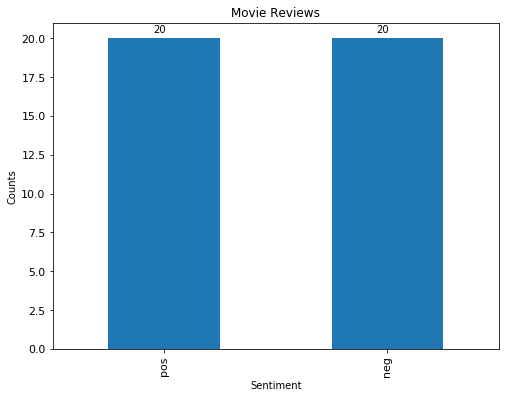

In [17]:
reviews_df.label.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11,);
plt.title('Movie Reviews', size=12)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.05 , y = reviews_df.label.value_counts().values[i] + 0.4, 
             s = reviews_df.label.value_counts().values[i])
plt.show()

#### Vectorizing for training set and test set:

In [18]:
train_df.head()

,label,reviews
0,neg,"Robert DeNiro plays the most unbelievably intelligent illiterate of all time. This movie is so wasteful of talent, it is truly disgusting. The script is unbelievable. The dialog is unbelievable. Jane Fonda's character is a caricature of herself, and not a funny one. The movie moves at a snail's pace, is photographed in an ill-advised manner, and is insufferably preachy. It also plugs in every cliche in the book. Swoozie Kurtz is excellent in a supporting role, but so what?<br /><br />Equally annoying is this new IMDB rule of requiring ten lines for every review. When a movie is this worthless, it doesn't require ten lines of text to let other readers know that it is a waste of time and tape. Avoid this movie."
1,neg,"I saw the capsule comment said ""great acting."" In my opinion, these are two great actors giving horrible performances, and with zero chemistry with one another, for a great director in his all-time worst effort. Robert De Niro has to be the most ingenious and insightful illiterate of all time. Jane Fonda's performance uncomfortably drifts all over the map as she clearly has no handle on this character, mostly because the character is so poorly written. Molasses-like would be too swift an adjective for this film's excruciating pacing. Although the film's intent is to be an uplifting story of curing illiteracy, watching it is a true ""bummer."" I give it 1 out of 10, truly one of the worst 20 movies for its budget level that I have ever seen."
2,neg,"If I had not read Pat Barker's 'Union Street' before seeing this film, I would have liked it. Unfortuntately this is not the case. It is actually my kind of film, it is well made, and in no way do I want to say otherwise, but as an adaptation, it fails from every angle.<br /><br />The harrowing novel about the reality of living in a northern England working-class area grabbed hold of my heartstrings and refused to let go for weeks after I had finished. I was put through tears, repulsion, shock, anger, sympathy and misery when reading about the women of Union Street. Excellent. A novel that at times I felt I could not read any more of, but I novel I simply couldn't put down. Depressing yes, but utterly gripping.<br /><br />The film. Oh dear. Hollywood took Barker's truth and reality, and showered a layer of sweet icing sugar over the top of it. A beautiful film, an inspiring soundtrack, excellent performances, a tale of hope and romance...yes. An adaptation of 'Union Street'...no.<b..."
3,neg,"This fanciful horror flick has Vincent Price playing a mad magician that realizes his vocational talents have been sold to another. He devise ways of avenging all those that have wronged him. His master scheme seems to back fire on him.<br /><br />Price is a little below par compared to his masterpieces, but is still the only reason to watch this thriller. Supporting cast includes Patrick O'Neal, Mary Murphy, Eva Gabor and Jay Novello.<br /><br />"
4,neg,"I basically skimmed through the movie but just enough to catch watch the plot was about. To tell you the truth it was kind of boring to me and at some spots it didn't make sense. The only reason I watched this movie in the first place was to see CHACE CRAWFORD!!! He is so hot, but in this movie his hair was kind of weird. But still hot.<br /><br />However, despite how hot CHACE is, it really did not make up for the film. I guess the plot isn't that bad but what really threw me over was the fact that they cuss in like every sentence. Is it that hard to express your anger without saying the F word every time?The cussing was annoying and the whole flashy, camera shaking thing gave me a headache.<br /><br />All in all, although the plot was OK, I found the film to be a bore and over dramatic. That's why I only cut to scenes with CHACE in it. LOL Anyways, not worth renting unless your a die-hard fan of a specific cast member like I was. Oh yeah the cast was Hot. The girls were HOT!!! Bu..."


In [19]:
# split train_df and test_df into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_df.reviews, test_df.reviews, train_df.label, test_df.label

# examine the object shapes
print('There are {} documents in training set.'.format(X_train.shape[0]))
print('There are {} documents in training set.'.format(X_test.shape[0]))

There are 20 documents in training set.
There are 20 documents in training set.


Training set: 
pos    10
neg    10
Name: label, dtype: int64



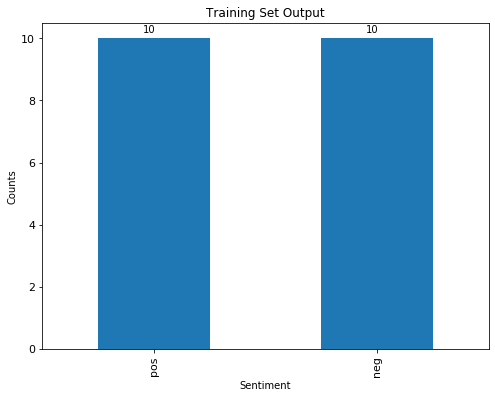

Test set: 
pos    10
neg    10
Name: label, dtype: int64



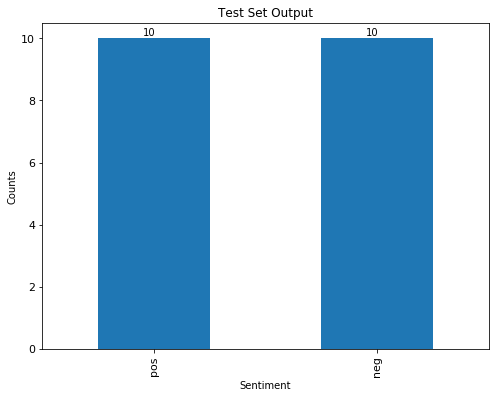

In [20]:
# examine output ratio between Training Set and Test Set
print('Training set: \n{}\n'.format(y_train.value_counts()))
y_train.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11);
plt.title('Training Set Output', size=12)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.05 , y = y_train.value_counts().values[i] + 0.2, 
             s = y_train.value_counts().values[i])
plt.show()

print('Test set: \n{}\n'.format(y_test.value_counts()))
y_test.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11);
plt.title('Test Set Output', size=12)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.05 , y = y_test.value_counts().values[i] + 0.1, 
             s = y_test.value_counts().values[i])
plt.show()

In [21]:
# use CountVectorizer to create document-term matrices from X_train and X_test
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

# fit and transform X_train
X_train_dtm = vect.fit_transform(X_train)

# only transform X_test
X_test_dtm = vect.transform(X_test)

# examine the shapes: rows are documents, columns are terms (aka "tokens" or "features")
print('Training set: \n{}\n'.format(X_train_dtm.shape))
print('Test set: \n{}\n'.format(X_test_dtm.shape))

Training set: 
(20, 1085)

Test set: 
(20, 1085)



In [22]:
# examine the last 50 features
print(vect.get_feature_names())

['10', '1960s', '20', '30', '35', '50', 'ability', 'about', 'absurd', 'abuse', 'accept', 'acclaim', 'accurate', 'acting', 'action', 'active', 'actors', 'actually', 'adaptation', 'addition', 'adjective', 'admire', 'adult', 'adults', 'adventures', 'advise', 'advised', 'afraid', 'african', 'after', 'afterthought', 'again', 'age', 'aggressive', 'alas', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'am', 'america', 'american', 'americana', 'amount', 'an', 'and', 'anger', 'angle', 'animals', 'ann', 'annoying', 'another', 'any', 'anymore', 'anything', 'anyways', 'anywhere', 'appeared', 'are', 'area', 'areas', 'aren', 'around', 'as', 'ask', 'associates', 'at', 'attention', 'audience', 'avenging', 'average', 'avoid', 'awakening', 'away', 'back', 'backflashes', 'bad', 'badly', 'barker', 'basically', 'be', 'beautiful', 'beauty', 'because', 'been', 'beer', 'before', 'beginning', 'behaved', 'behavior', 'being', 'believable', 'believe', 'below', 'best', 'bette', 'better', 'bigge

In [23]:
# show default parameters for CountVectorizer
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### Use Naive Bayes to predict sentitment

#### Create a function for comparing the accuracy of different approaches

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# define a function that accepts a vectorizer and calculates the accuracy
def vectorize_test(vect):
    '''
    Expect: a vectorizer object with different parameter setting, ex: CountVectorizer(lowercase=False)
    Modifies: (1) for the vecterization, fit and transform the training set; then transform on the test set
              (2) fort the modeling, train the nb model with training set and evaluate with test set
    Returns: 1. the number of feature used and  
             2. the accuracy rate
    '''
    
    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features used: {}'.format(X_train_dtm.shape[1]))
    
    # use Multinomial Naive Bayes to predict the sentiment
    gnb = GaussianNB()
    gnb.fit(X_train_dtm.toarray(), y_train)
    y_pred_class = gnb.predict(X_test_dtm.toarray())
    
    # print the accuracy of its predictions
    print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred_class)*100, 2)))

**Approach 1:** null model

In [25]:
print('Approach 1 (null model):\n')
# calculate null accuracy
y_test.value_counts().head(1) / y_test.shape

Approach 1 (null model):



pos    0.5
Name: label, dtype: float64

The null model will be the baseline for the model selection. No other models below this accruacy can be chosen as the best model.

**Approach** 2: Default Parameters for CountVectorizer  
(`stop_words=None`, `lowercase=True`, `min_df=1`, `max_features=None`, `max_df=1.0`)

In [26]:
print('Approach 2 (Default Parameters for CountVectorizer):\n')
# use the default parameters
vect = CountVectorizer()
vectorize_test(vect)

Approach 2 (Default Parameters for CountVectorizer):

Features used: 1085
Accuracy: 40.0%


**Approach 3:** Don't convert to lowercase  
(`lowercase=False`)

In [27]:
print('Approach 3 (Not convert to lowercase):\n')
# not convert to lowercase
vect = CountVectorizer(lowercase=False)
vectorize_test(vect)

Approach 3 (Not convert to lowercase):

Features used: 1152
Accuracy: 40.0%


**Approach** 4: remove stop_words and not convert to lowercase  
(`stop_words='english'`, `lowercase=False`)

In [28]:
print('Approach 4 (remove stop_words and not convert to lowercase):\n')
# remove stop_words and not convert to lowercase  
vect = CountVectorizer(lowercase=False, stop_words='english')
vectorize_test(vect)

Approach 4 (remove stop_words and not convert to lowercase):

Features used: 981
Accuracy: 35.0%


**Approach** 5: include unigram and bigrams  
(`ngram_range=(1, 2)`)

In [29]:
print('Approach 5 (include unigram and bigrams):\n')
# include unigram and bigrams
vect = CountVectorizer(ngram_range=(1, 2))
vectorize_test(vect)

Approach 5 (include unigram and bigrams):

Features used: 3652
Accuracy: 40.0%


**Approach** 6: include unigram and bigrams, not convert to lowercase  
(`ngram_range=(1, 2)`, `lowercase=False`)

In [30]:
print('Approach 6 (include unigram and bigrams, not convert to lowercase):\n')
# include unigram and bigrams, not convert to lowercase
vect = CountVectorizer(ngram_range=(1, 2), lowercase=False)
vectorize_test(vect)

Approach 6 (include unigram and bigrams, not convert to lowercase):

Features used: 3763
Accuracy: 35.0%


**Approach** 7:  all alphabetic characters and not convert to lowercase  
(`token_pattern='^[^\w]+$'`, `lowercase=False`)

In [31]:
print('Approach 7 (all alphabetic characters and not convert to lowercase):\n')
# include unigram and bigrams, not convert to lowercase
vect = CountVectorizer(token_pattern='[a-z]+', lowercase=False)
vectorize_test(vect)

Approach 7 (all alphabetic characters and not convert to lowercase):

Features used: 1115
Accuracy: 40.0%


**Approach** 8: English stemmer from nltk  
(`analyzer=stemmed_words`)

In [32]:
# Define stemmed_words function for CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))


In [33]:
print('Approach 8 (English stemmer from nltk):\n')
# English stemmer from nltk
vect = CountVectorizer(analyzer=stemmed_words, token_pattern='^[^\w]+$')
vectorize_test(vect)

Approach 8 (English stemmer from nltk):

Features used: 972
Accuracy: 35.0%


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
model = ['null model', 'default model' ,'lower/uppercase model', 'stopwords_lower/uppercase model', 
         'uni/bigrams_lowercase model', 'uni/bigrams_lower/uppercase model', 'alphabet model', 'NLTK_stemmer model']
accuracy = [50,    40,     40,   35,   40,    35,    40,    35]
features = [0,     1085,   1152, 981,  3652,  3763,  1115,   972]

models = pd.DataFrame({'model':model, 'accuracy':accuracy, 'features':features})
models = models.set_index('model')

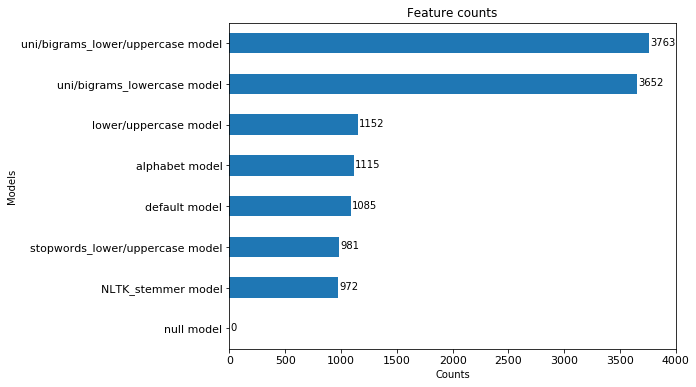

In [35]:
models.loc[:,'features'].sort_values().plot(kind='barh', figsize=(8,6), fontsize=11)
plt.xlim(0,4000)
plt.title('Feature counts', size=12)
plt.xlabel('Counts')
plt.ylabel('Models')
# add annotation on each bar
for i in range(8):
    plt.text(y = i - 0.05 , x = models.loc[:,'features'].sort_values()[i] + 10, 
             s = models.loc[:,'features'].sort_values()[i])

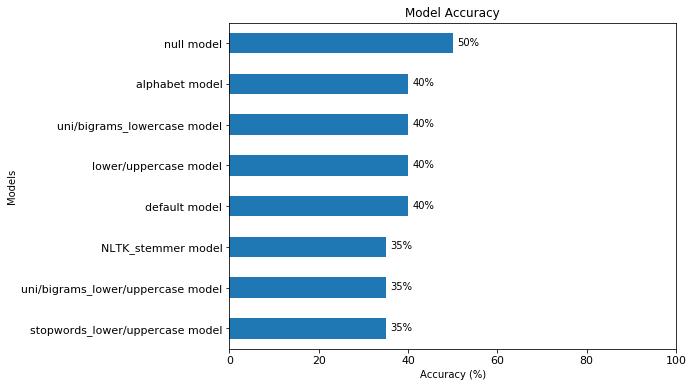

In [36]:
models.loc[:,'accuracy'].sort_values().plot(kind='barh', figsize=(8,6), fontsize=11)
plt.xlim(0,100)
plt.title('Model Accuracy', size=12)
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
# add annotation on each bar
for i in range(8):
    plt.text(y = i - 0.05 , x = models.loc[:,'accuracy'].sort_values()[i] + 1, 
             s = str(models.loc[:,'accuracy'].sort_values()[i])+'%')